<a href="https://colab.research.google.com/github/Pixer007/Pixer007-AMCAT-EDA/blob/main/AMCAT_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step - 1: Data Description & Objective**

*Dataset Description:*

The Data is about the academic performance and academic history of the engineering employees. It also covers the demographics.

*Objective:*

The objective of the study is to predict the values of dependent variables which are Salary, Job Titles, and Job Locations with the change in independent variables.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/data.xlsx - Sheet1.csv')

In [ ]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
data.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [ ]:
data.shape

(3998, 39)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

**Univariate Analysis:**



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Salary'>

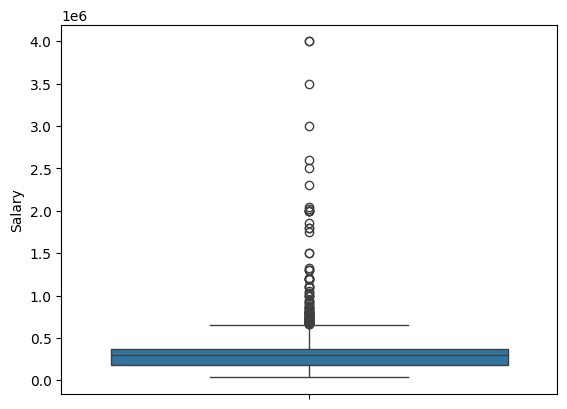

In [ ]:
import seaborn as sns
sns.boxplot(data=data['Salary'])

The Bubbles in the Box Plot represents the outliers in that particular feature.

*   The Median Salary is around 1 Million.
*   Salaries of majority of the employees lie between 0.5 - 3.5 Million.
*   About 50% of employees have salaries between 0.3 - 0.6
*   Their are many employees having salary more than 3.5 Million.





/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='10percentage'>

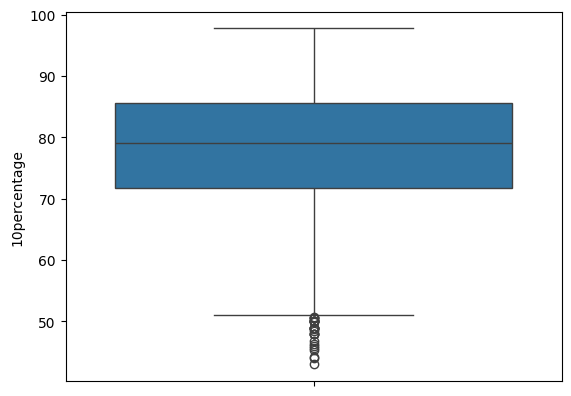

In [ ]:
sns.boxplot(data=data['10percentage'])

10 Percentage Feature Analysis:

*   The highest percentage is about 97.5%
*   The Median is about 79%.
*   About 95% of the employees percentage's lie between 51% - 97.5%
*   Their are employees having less than 51% which are considered outliers for this feature.
*   About 50% of Employees have their 10th Percentage between 72% - 85%.







/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='12graduation'>

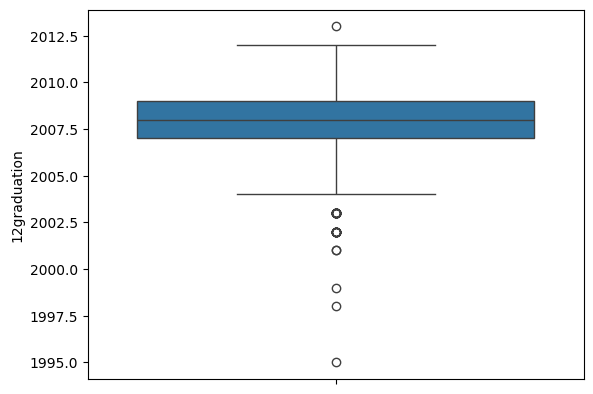

In [ ]:
sns.boxplot(data=data['12graduation'])

12 Graduation Feature Analysis:


*   The Median Graduation year that we have is 2008 for employees.
*   The Graduation year of majority of the employees working is between 2003 - 2011.
*   The Graduation year of about 50% of employees is between 2007 - 2009.
*   We have employees having the graduation year below than 2003 and also employees having the graduation year above 2011.





/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='12percentage'>

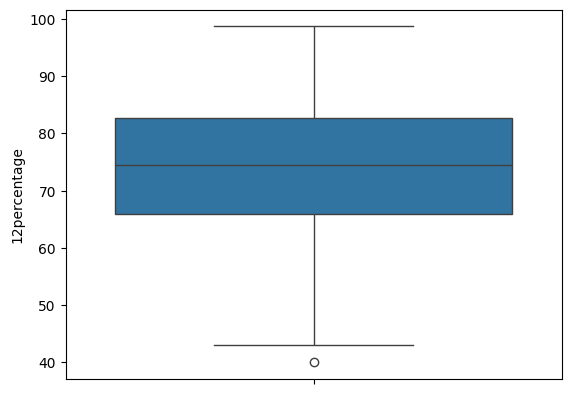

In [ ]:
sns.boxplot(data=data['12percentage'])

12 Percentage Feature Analysis:

*  The Median 12th Percentage is about 75%.
*  The 50% of employees have their 12th percentage between 66% - 82.5%.
*  The Max 12th Percentage is 98%.
*  Majority of the employees have percentage between 43% - 98%.
*  Their is an employee having percentage below 43%.*italicized text*

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='CollegeTier'>

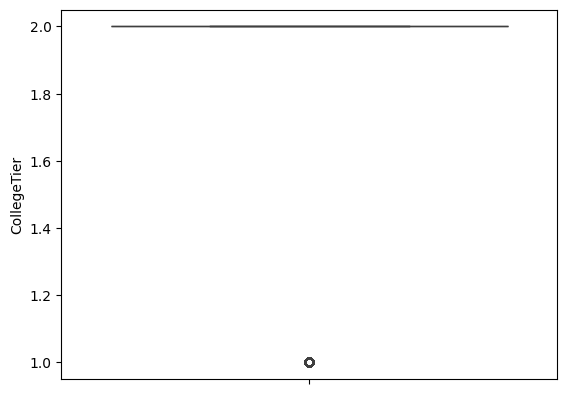

In [ ]:
sns.boxplot(data['CollegeTier'])

College Tier Feature Analysis:
*   99% of employees are from Tier - 2 College.
*   Rest 1% from Tier - 1 College.



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='collegeGPA'>

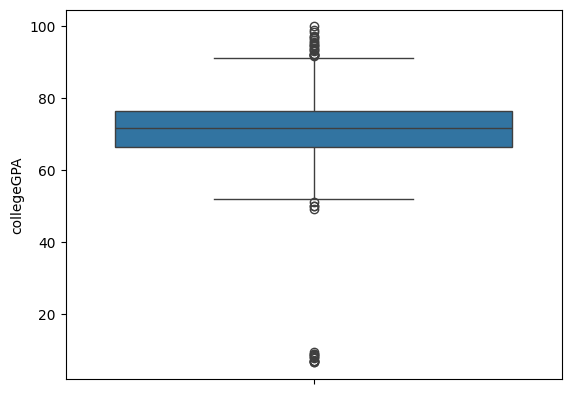

In [ ]:
sns.boxplot(data=data['collegeGPA'])

College GPA Feature Analysis:

*   Majority of the employees have their College GPA between 50 - 90.
*   The Median is 72.
*   About 50% of the Employees have their College GPA ranging between 65 - 75.
*   Their are employees having more than 90 in their College GPA, and their are employees having less than 50 also, some are also below 10. `They can be considered outliers here`.





/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='GraduationYear'>

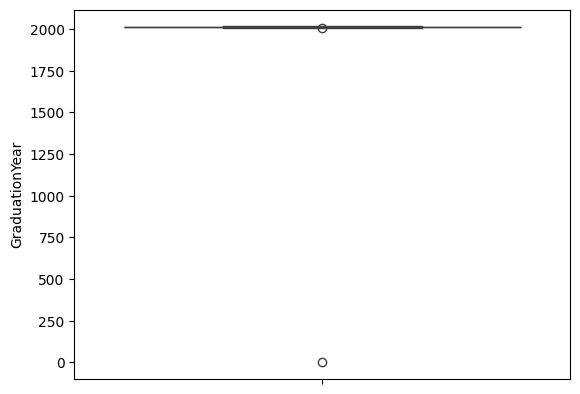

In [ ]:
sns.boxplot(data = data['GraduationYear'])

Graduation Year Feature Analysis:
*   About 99% of Employees have graduated in 2000.



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='English'>

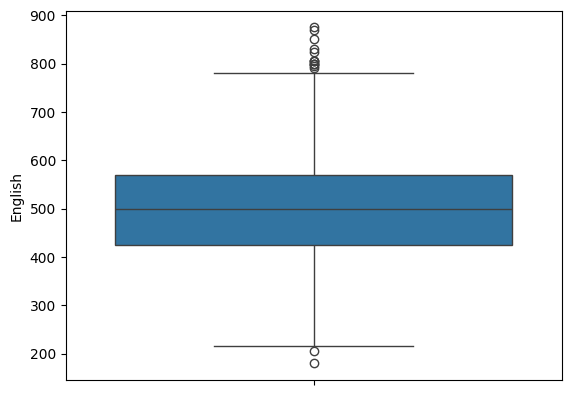

In [ ]:
sns.boxplot(data = data['English'])

AMCAT English Score Analysis:

*   The Median Score we have is 500.
*   The Scores of 50% of Employees is ranging between 420 - 580.
*   The Scores of the majority of the employees lie between 210 - 780.
*   Scores below 210 and above 780 can be considered outliers here.





/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Logical'>

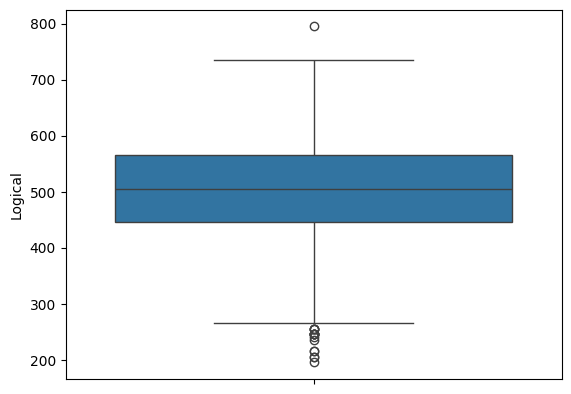

In [ ]:
sns.boxplot(data = data['Logical'])

AMCAT Logical Score:

*   The Median Score in Logical Exam of AMCAT is also 500.
*   50% of Employees have scores between 450 - 550.
*   Almost all employees scores lie in range between 260 - 720.
*   Their are employees having score above 720 and below 260. They can be considered outliers for this feature.





/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Quant'>

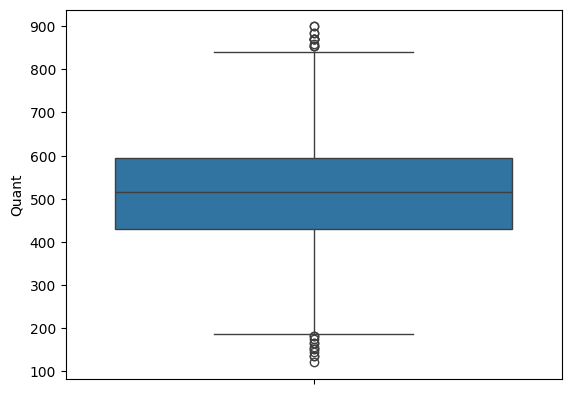

In [ ]:
sns.boxplot(data = data['Quant'])


AMCAT Quant Section Score Analysis:


*   The Median Score here is 500.
*   The Range of scores of majority of employees is between 190 - 830.
*   50% employees have scores between 410 - 590.
*   Rest are outliers.





/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Domain'>

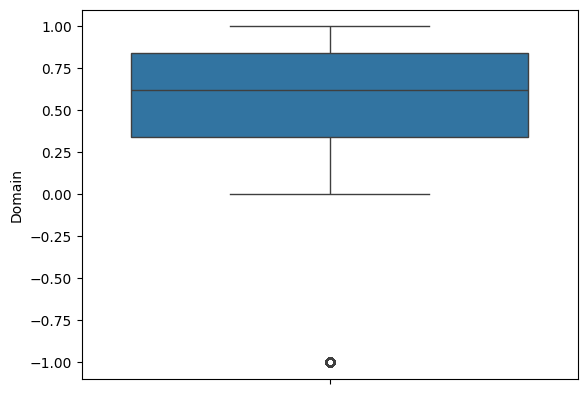

In [ ]:
sns.boxplot(data = data['Domain'])

AMCAT Domain Based Section Scores:

*   The Median is 0.65
*   50% of the employees domain's based scores lies between 0.30 - 0.80
*   Majority of the population lies between 0.00 - 1





/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='ComputerProgramming'>

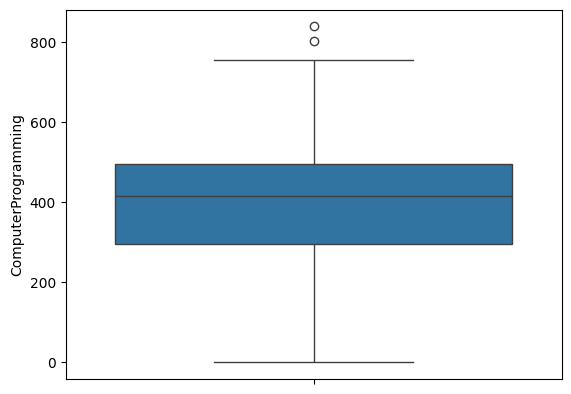

In [ ]:
sns.boxplot(data = data['ComputerProgramming'])

AMCAT Score Analysis of Computer Programming Section:

*   The Median of the Computer Programming Section is 410.
*   50% of the employees lies between 300 - 500.
*   Majority of the population lies between 0 - 750.
*   Their are employees who have scores more than 750.





/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='ElectronicsAndSemicon'>

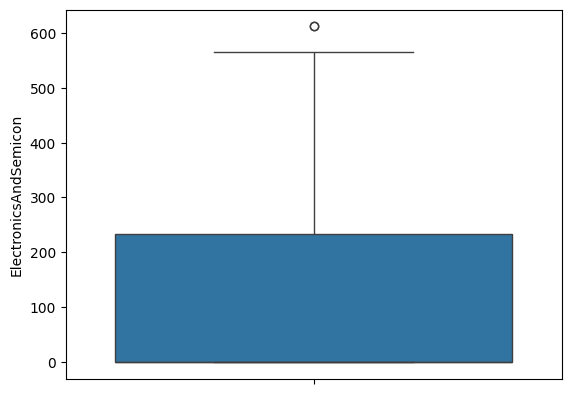

In [ ]:
sns.boxplot(data = data['ElectronicsAndSemicon'])

AMCAT ElectronicsAndSemicon:

*   50% of Employees scores lies between 0-230.
*   Majority of the employees scores lies between 0-570.



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='ComputerScience'>

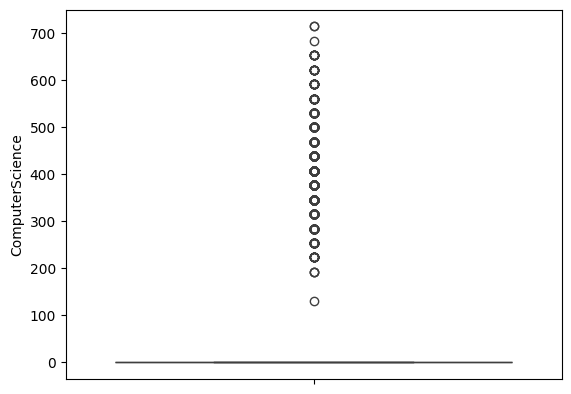

In [ ]:
sns.boxplot(data = data['ComputerScience'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='MechanicalEngg'>

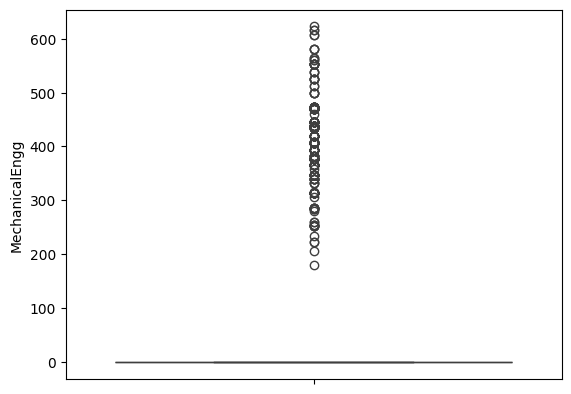

In [ ]:
sns.boxplot(data = data['MechanicalEngg'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='ElectricalEngg'>

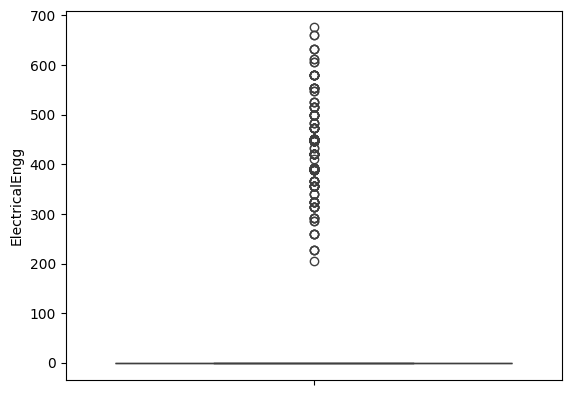

In [ ]:
sns.boxplot(data = data['ElectricalEngg'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='TelecomEngg'>

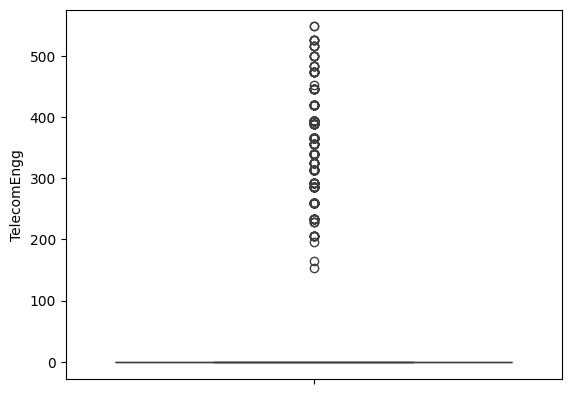

In [ ]:
sns.boxplot(data = data['TelecomEngg'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='CivilEngg'>

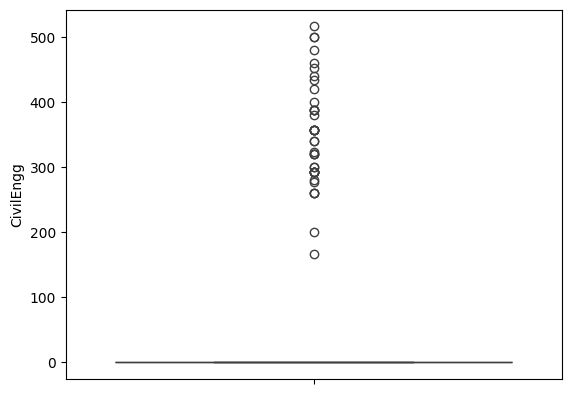

In [ ]:
sns.boxplot(data=data['CivilEngg'])

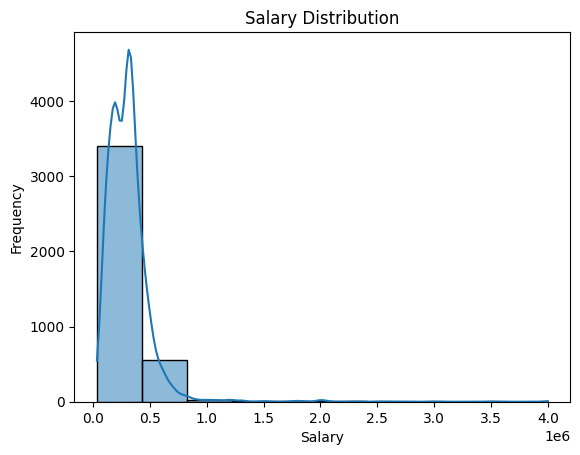

In [ ]:
sns.histplot(data['Salary'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()

Observations:

*   Higher Salaries are given to less people only.
*   Around 3500 employees have salaries between 0.0 - 0.4



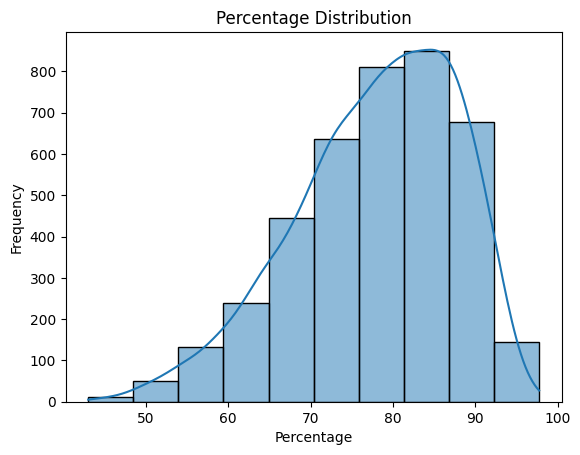

In [ ]:
sns.histplot(data['10percentage'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Percentage Distribution')
plt.show()

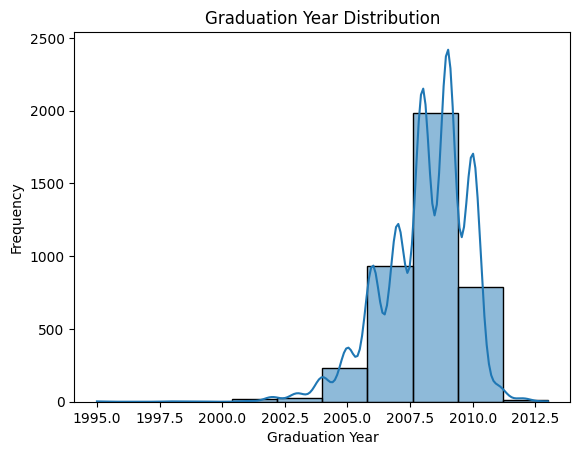

In [ ]:
sns.histplot(data['12graduation'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('Graduation Year')
plt.ylabel('Frequency')
plt.title('Graduation Year Distribution')
plt.show()

Observation:
*   About 1900 of the employees have graduated between 2008 - 2009
*   About 3500 of the employees have graduated between 2006 - 2011.



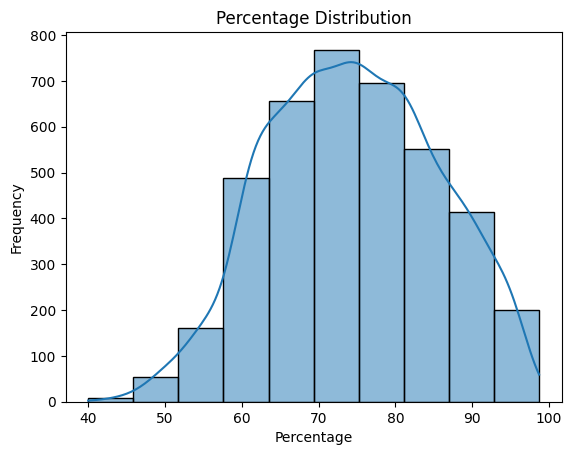

In [ ]:
sns.histplot(data['12percentage'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Percentage Distribution')
plt.show()

Observations:
*   About 2100 employees have percentage between 65% - 82%
*   Their are around 200 employees having percentage more than 95%.
*   About 200 employees have less than 55%.





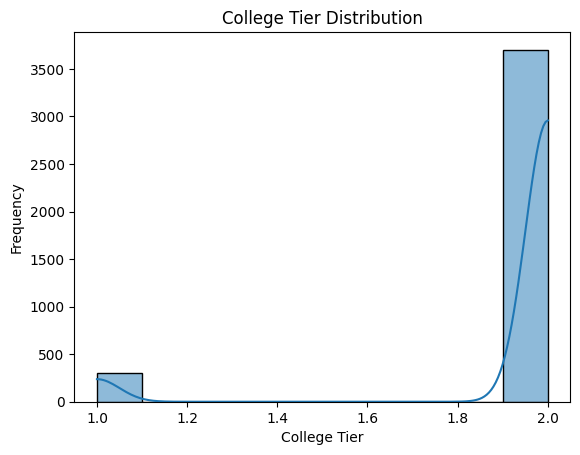

In [ ]:
sns.histplot(data['CollegeTier'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('College Tier')
plt.ylabel('Frequency')
plt.title('College Tier Distribution')
plt.show()

Observations:
*   More than 3500 employees have graduated from a Tier - 2 College.
*   About 300 employees have graduated from a Tier - 1 College.



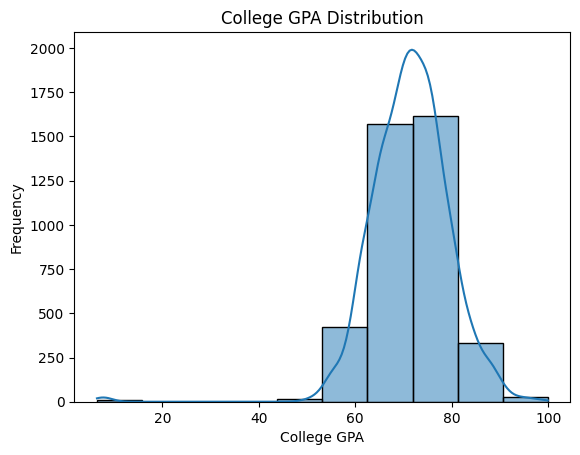

In [ ]:
sns.histplot(data['collegeGPA'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('College GPA')
plt.ylabel('Frequency')
plt.title('College GPA Distribution')
plt.show()

Observations:
*   About 3250 employees have GPA between 62 - 81.



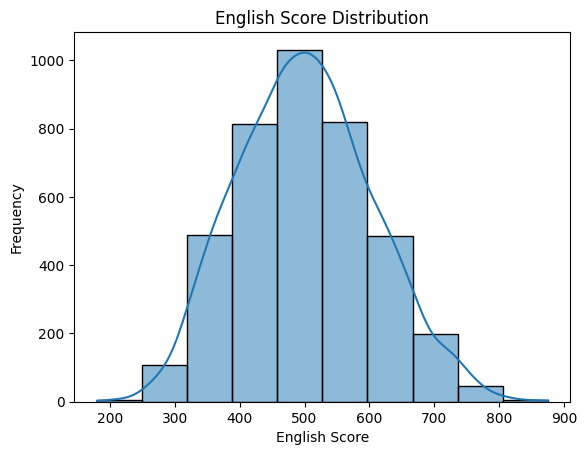

In [ ]:
sns.histplot(data['English'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('English Score')
plt.ylabel('Frequency')
plt.title('English Score Distribution')
plt.show()

Observations:
*   More than 1000 employees have scores between 450 - 520.



Text(0.5, 1.0, 'Logical Score Distribution')

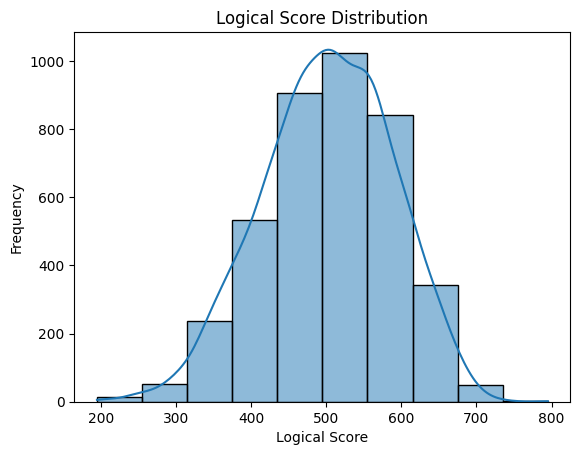

In [ ]:
sns.histplot(data['Logical'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('Logical Score')
plt.ylabel('Frequency')
plt.title('Logical Score Distribution')

Text(0.5, 1.0, 'Quant Score Distribution')

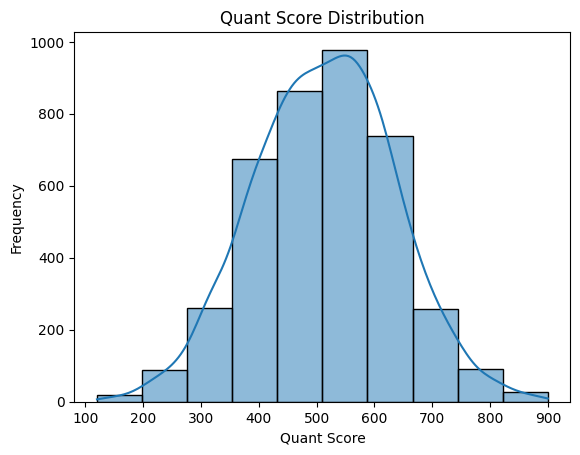

In [ ]:
sns.histplot(data['Quant'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('Quant Score')
plt.ylabel('Frequency')
plt.title('Quant Score Distribution')
#

Text(0.5, 1.0, 'Domain Score Distribution')

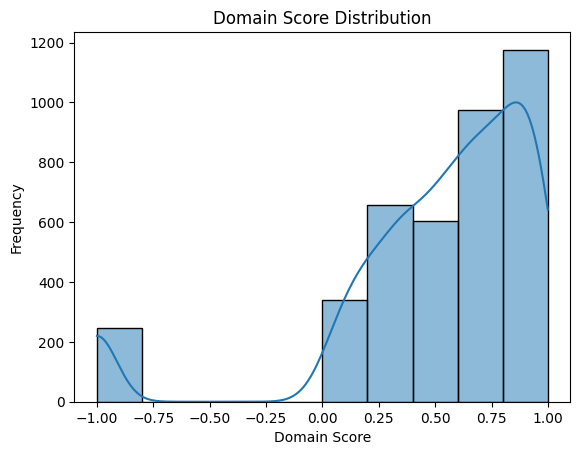

In [ ]:
sns.histplot(data['Domain'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('Domain Score')
plt.ylabel('Frequency')
plt.title('Domain Score Distribution')
#

Text(0.5, 1.0, 'Computer Programming Score Distribution')

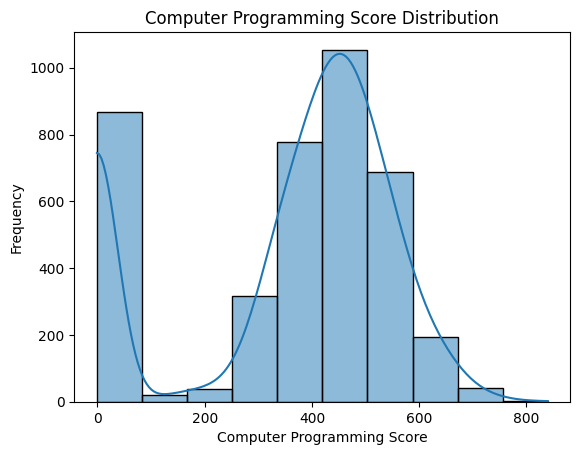

In [ ]:
sns.histplot(data['ComputerProgramming'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('Computer Programming Score')
plt.ylabel('Frequency')
plt.title('Computer Programming Score Distribution')
#

Text(0.5, 1.0, 'ElectronicsAndSemicon Score Distribution')

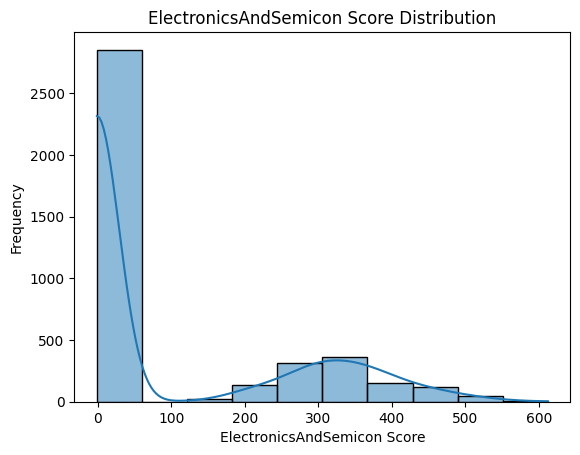

In [ ]:
sns.histplot(data['ElectronicsAndSemicon'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('ElectronicsAndSemicon Score')
plt.ylabel('Frequency')
plt.title('ElectronicsAndSemicon Score Distribution')
#

Text(0.5, 1.0, 'ComputerScience Score Distribution')

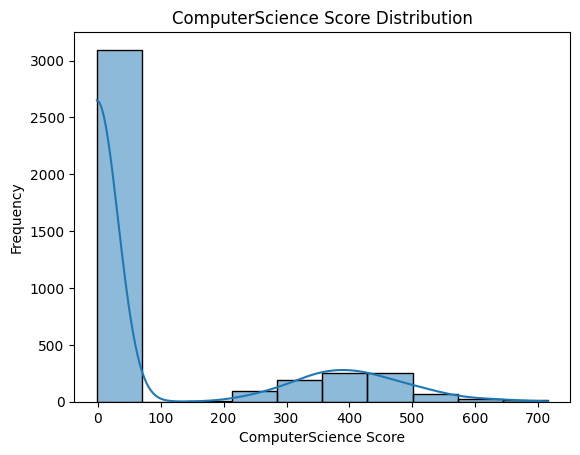

In [ ]:
sns.histplot(data['ComputerScience'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('ComputerScience Score')
plt.ylabel('Frequency')
plt.title('ComputerScience Score Distribution')
#

Text(0.5, 1.0, 'MechanicalEngg Score Distribution')

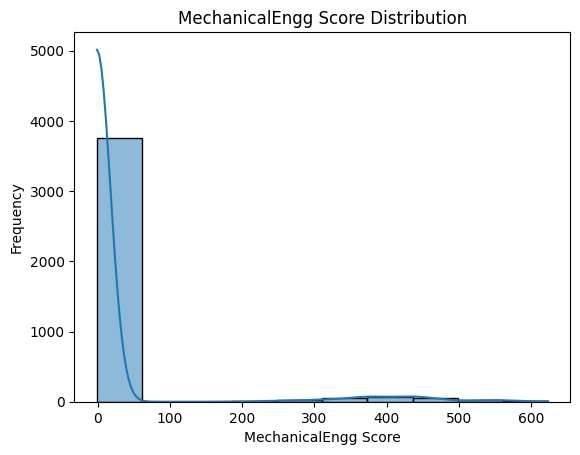

In [ ]:
sns.histplot(data['MechanicalEngg'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('MechanicalEngg Score')
plt.ylabel('Frequency')
plt.title('MechanicalEngg Score Distribution')
#

Text(0.5, 1.0, 'ElectricalEngg Score Distribution')

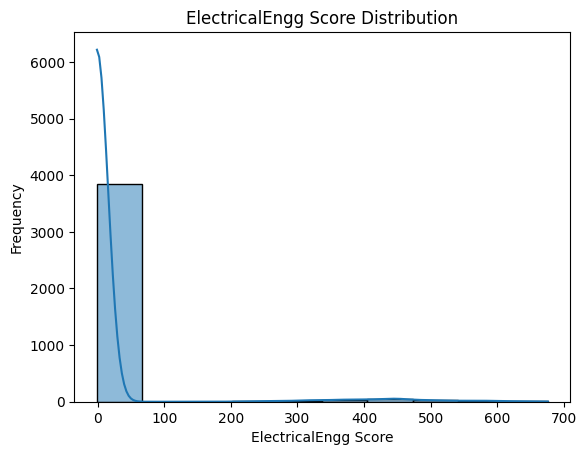

In [ ]:
sns.histplot(data['ElectricalEngg'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('ElectricalEngg Score')
plt.ylabel('Frequency')
plt.title('ElectricalEngg Score Distribution')
#

Text(0.5, 1.0, 'TelecomEngg Score Distribution')

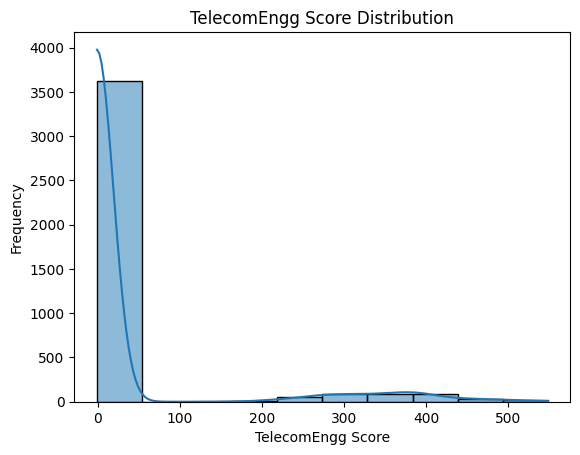

In [ ]:
sns.histplot(data['TelecomEngg'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('TelecomEngg Score')
plt.ylabel('Frequency')
plt.title('TelecomEngg Score Distribution')
#

Text(0.5, 1.0, 'CivilEngg Score Distribution')

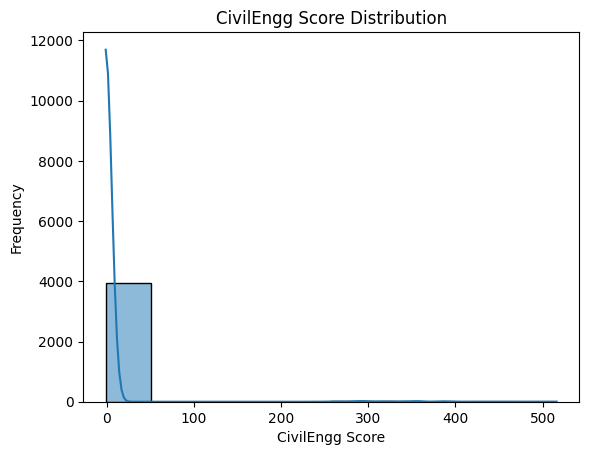

In [ ]:
sns.histplot(data['CivilEngg'], bins=10, kde=True)

# Adding labels and title
plt.xlabel('CivilEngg Score')
plt.ylabel('Frequency')
plt.title('CivilEngg Score Distribution')
#

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

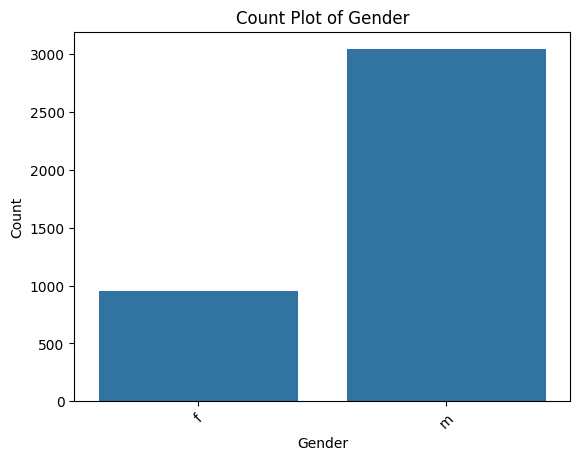

In [ ]:
sns.countplot(x='Gender', data=data)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count Plot of Gender')
plt.xticks(rotation=45)  # Rotate the labels if they overlap
plt.show()

Observations:
*   About 900 employees are female
*   Their are around 3000 male employees



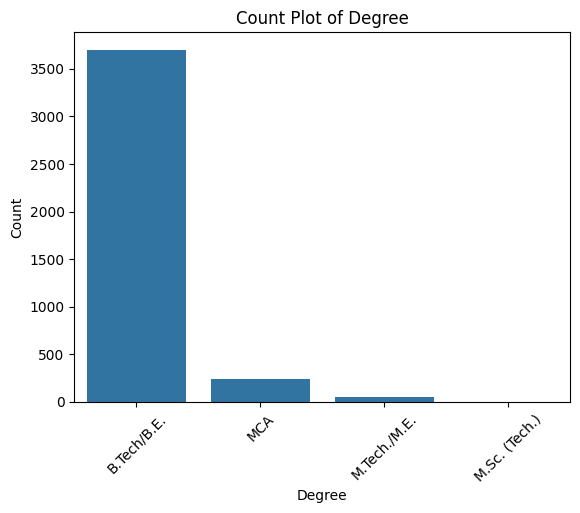

In [ ]:
sns.countplot(x='Degree', data=data)

# Adding labels and title
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Count Plot of Degree')
plt.xticks(rotation=45)  # Rotate the labels if they overlap
plt.show()

Observations:
*   More than 3500 employees are B.Tech/B.E. graduates.
*   Rest employees are either MCA, M.Tech/M. E./M.Sc. (Tech.) Graduates.



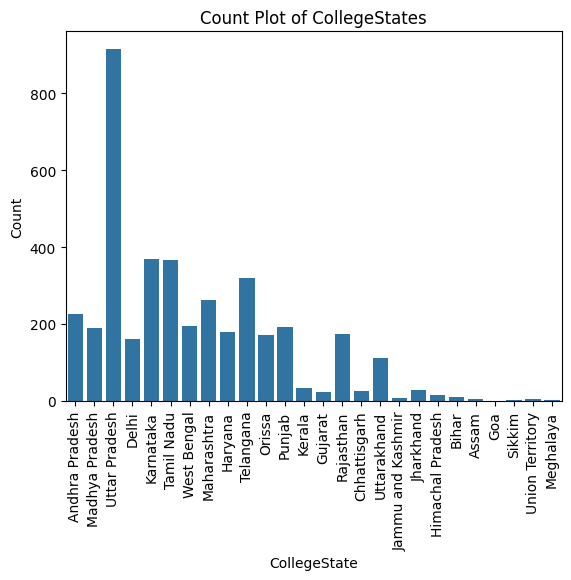

In [ ]:
sns.countplot(x='CollegeState', data=data)

# Adding labels and title
plt.xlabel('CollegeState')
plt.ylabel('Count')
plt.title('Count Plot of CollegeStates')
plt.xticks(rotation=90)  # Rotate the labels if they overlap
plt.show()

Observations:
*   Majority of the employees are from U.P around 900.
*   Followed by Karnataka and Tamil Nadu both having around 370 employees.



***Bivariate Analysis:***

**Numerical to Numerical Analysis**

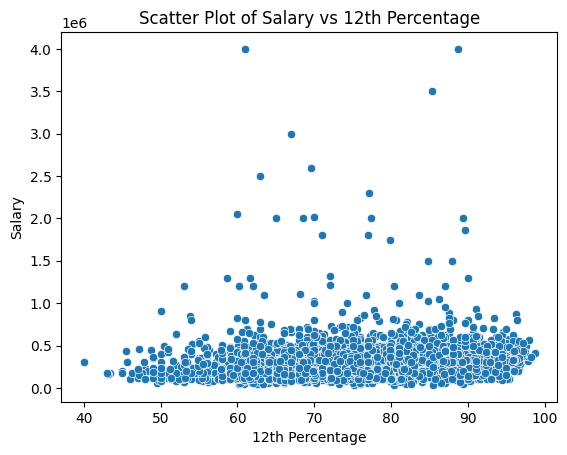

In [ ]:
sns.scatterplot(x=data['12percentage'], y=data['Salary'])

# Adding labels and title
plt.xlabel('12th Percentage')
plt.ylabel('Salary')
plt.title('Scatter Plot of Salary vs 12th Percentage')

# Show the plot
plt.show()

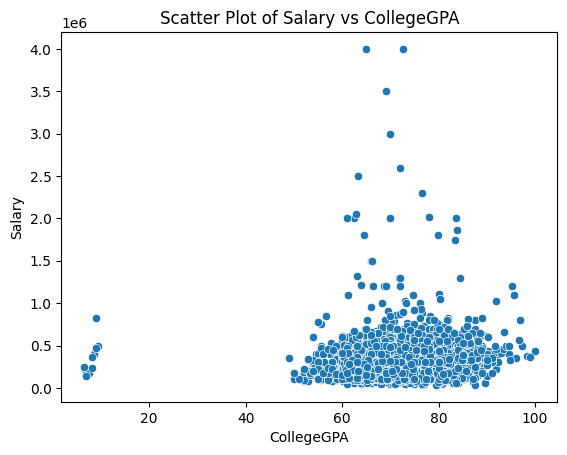

In [ ]:
sns.scatterplot(x=data['collegeGPA'], y=data['Salary'])

# Adding labels and title
plt.xlabel('CollegeGPA')
plt.ylabel('Salary')
plt.title('Scatter Plot of Salary vs CollegeGPA')

# Show the plot
plt.show()

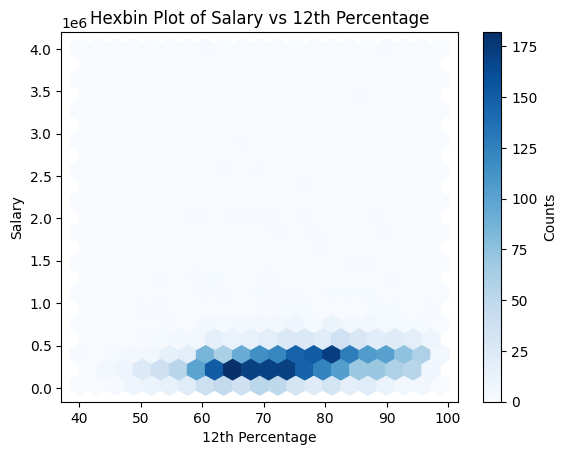

In [53]:
plt.hexbin(data['12percentage'], data['Salary'], gridsize=20, cmap='Blues')

# Adding color bar to indicate density
plt.colorbar(label='Counts')

# Adding labels and title
plt.xlabel('12th Percentage')
plt.ylabel('Salary')
plt.title('Hexbin Plot of Salary vs 12th Percentage')

# Show the plot
plt.show()

Observations:
*   From Numerical to Numerical Analysis here, We should use hexbin plots as it is more understandable and more clear then scatter plots.
*   Here we can see that employees having around 65% in their 12th Graduation they have a salary of 0.25 on an average.



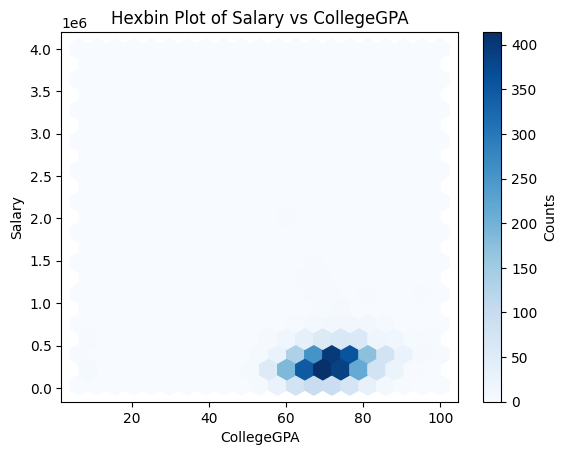

In [54]:
plt.hexbin(data['collegeGPA'], data['Salary'], gridsize=20, cmap='Blues')

# Adding color bar to indicate density
plt.colorbar(label='Counts')

# Adding labels and title
plt.xlabel('CollegeGPA')
plt.ylabel('Salary')
plt.title('Hexbin Plot of Salary vs CollegeGPA')

# Show the plot
plt.show()

**Numerical to Categorical Analysis:**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


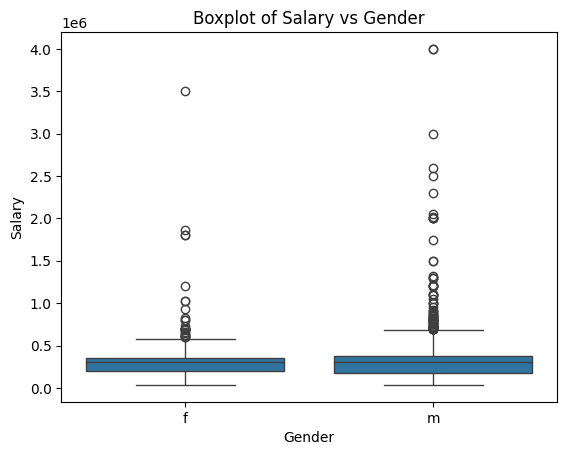

In [56]:
sns.boxplot(x='Gender', y='Salary', data=data)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Boxplot of Salary vs Gender')

# Show the plot
plt.show()

Observations:
*   The Median Salary of a female employee is around 0.3 million.
*   Majority of the female employees have salary between the range of 0.0 - 0.65.
*   Around 50% of the female employees have salary ranging between 0.2 - 0.3.
*   For Male Employees the median salary is 0.27 million.
*   Around 50% of male employees have salary ranging between 0.15 - 0.31 million.







/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


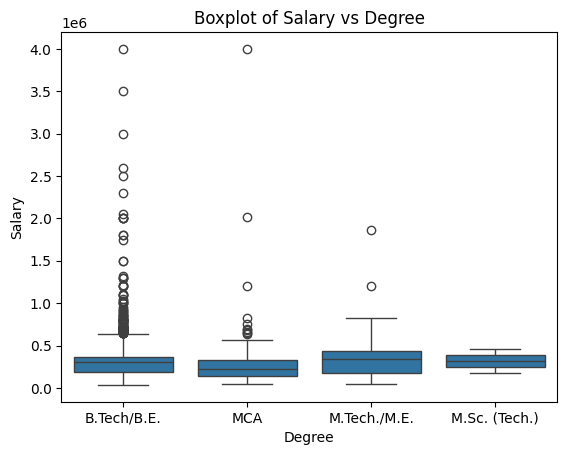

In [58]:
sns.boxplot(x='Degree', y='Salary', data=data)

# Adding labels and title
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.title('Boxplot of Salary vs Degree')

# Show the plot
plt.show()

Observations:
*   B.Tech/B.E. graduates have a median salary of 0.3 million.
*   Majority of the B.Tech/B.E. graduates have salary ranging between 0.1 million - 0.7 million.
*   The Median salary of a M.Tech/M.E. graduates is around 0.4 which is highest as compared to any other graduates.





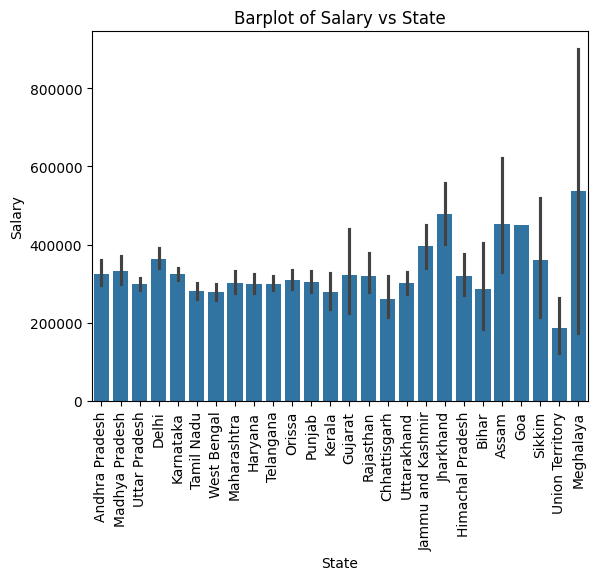

In [63]:
sns.barplot(x='CollegeState', y='Salary', data=data)

# Adding labels and title
plt.xlabel('State')
plt.ylabel('Salary')
plt.title('Barplot of Salary vs State')
plt.xticks(rotation=90)

# Show the plot
plt.show()
#

Observations:
*   The employees from Meghalaya have the highest avg salary.
*   Followed by Jharkhand.
*   Employees from Union Territory have an avg salary of 1.8 million.





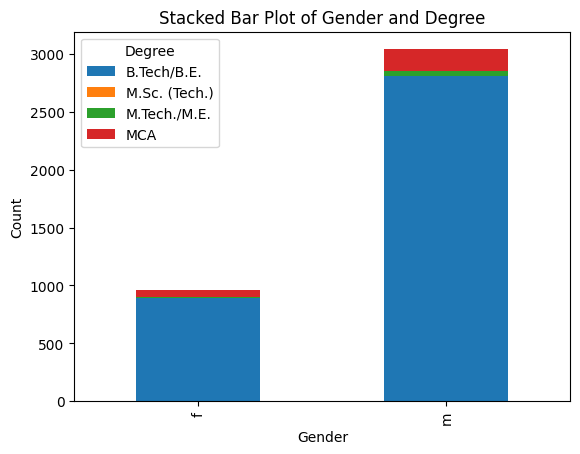

In [7]:
crosstab_data = pd.crosstab(data['Gender'], data['Degree'])

# Plot a stacked bar plot
crosstab_data.plot(kind='bar', stacked=True)

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Gender and Degree')
plt.show()

Observations:
*   From the above graph we can observe that both male and female opt for B.Tech/B. E. majorly as a degree.
*   Very less males and females opt for M.Sc. (Tech.) as their post graduation degree among employees.



**Research Questions**

In [22]:
data['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [23]:
filtered_data = data[data['Degree'].isin(['B.Tech/B.E.'])]
filtered_data = data[data['Designation'].isin(['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer'])]

filtered_data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
19,train,466888,325000.0,2014-09-01,present,software engineer,Pune,f,11/30/90 0:00,79.00,...,-1,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.40780,-0.1295
20,train,140069,320000.0,2010-11-01,9/1/12 0:00,software engineer,Bangalore,f,7/25/88 0:00,91.20,...,-1,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.29020,0.3444
21,train,339689,200000.0,2012-08-01,12/1/13 0:00,software engineer,-1,f,8/20/91 0:00,75.67,...,-1,-1,-1,-1,-1,-1.0355,-0.5913,-1.3599,0.06223,-1.3539
31,train,1094324,340000.0,2014-08-01,4/1/15 0:00,software engineer,Bangalore,m,10/23/92 0:00,77.20,...,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.50210,0.2889
36,train,602377,270000.0,2013-03-01,present,software engineer,Hyderabad,f,8/21/92 0:00,91.50,...,-1,-1,-1,-1,-1,-1.0208,0.2124,0.4711,0.27270,-0.0943


In [24]:
avg_salary = filtered_data.groupby('Designation')['Salary'].mean().reset_index()
print(avg_salary)

          Designation         Salary
0  associate engineer  290000.000000
1   hardware engineer  281250.000000
2   software engineer  341215.213358


The Claim by Times of India article stands `True` for our dataset.

In [25]:
from scipy.stats import chi2_contingency

# Create a contingency table for two categorical features (e.g., 'Feature1' and 'Feature2')
contingency_table = pd.crosstab(data['Gender'], data['Specialization'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Check the p-value (if p < 0.05, then the features are likely dependent)
print(f"Chi-Square Test p-value: {p}")
if p < 0.05:
    print("The features are likely related.")
else:
    print("The features are independent.")


Chi-Square Test p-value: 1.2453868176976918e-06
The features are likely related.


Observations:
*   Looking at the Chi-Score we can figure out that their is some association between the gender and specialization as per our dataset.



Conclusion:

Through this EDA, I guess the organization can better understand the ability and demographics insights of the employees and can work on the key areas of improvements and can plan for its next upcoming year operations.